# Task 1: Initial Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
#import .csv document using pandas
df = pd.read_csv('supermarket_sales2.csv')

In [55]:
#display last five rows in current dataset
df.tail()

Invoice ID Branch      City Customer type  Gender  \
967  347-56-2442      A    Yangon        Normal    Male   
968  849-09-3807      A    Yangon        Member  Female   
969  849-09-3807      A    Yangon        Member  Female   
970  745-74-0715      A    Yangon        Normal    Male   
971  452-04-8808      B  Mandalay        Normal    Male   

               Product line  Unit price  Quantity  Tax 5%    Total     Date  \
967      Home and lifestyle       65.82       1.0   3.291   69.111  2/22/19   
968     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
969     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
970  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
971  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

      Time  Payment    cogs  gross margin percentage  gross income  Rating  
967  15:33     Cash   65.82                 4.761905         3.291     4.1  
968  13:28     Cash  618.38                 4.761905        30.919     6.6  
969  13:28     Cash  618.38                 4.761905        30.919     6.6  
970  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
971  15:17     Cash  609.56                 4.761905        30.478     5.5

In [56]:
#display column names
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [57]:
#display column data type
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [58]:
#change 'Date' data type from object to date type
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
#check column data types again
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [60]:
#get 'Date' column from dataset
df['Date']

0     2019-01-28
1     2019-01-10
2     2019-03-15
3     2019-02-06
4     2019-01-07
         ...    
967   2019-02-22
968   2019-02-18
969   2019-02-18
970   2019-03-10
971   2019-01-26
Name: Date, Length: 972, dtype: datetime64[ns]

In [61]:
#group by 'Date'
df.set_index('Date',inplace=True)

In [62]:
#display commonly used methods of each numerical columns
df.describe()

Unit price    Quantity      Tax 5%        Total        cogs  \
count  965.000000  952.000000  972.000000   972.000000  972.000000   
mean    55.646093    5.505252   15.366447   322.695377  307.328930   
std     26.564106    2.936763   11.759974   246.959461  235.199487   
min     10.080000    1.000000    0.508500    10.678500   10.170000   
25%     32.620000    3.000000    5.833875   122.511375  116.677500   
50%     55.390000    5.000000   12.066000   253.386000  241.320000   
75%     77.950000    8.000000   22.445250   471.350250  448.905000   
max     99.960000   10.000000   49.650000  1042.650000  993.000000   

       gross margin percentage  gross income      Rating  
count             9.720000e+02    972.000000  972.000000  
mean              4.761905e+00     15.366447    6.982099  
std               6.131586e-14     11.759974    1.715738  
min               4.761905e+00      0.508500    4.000000  
25%               4.761905e+00      5.833875    5.500000  
50%               4.761905e+00     12.066000    7.000000  
75%               4.761905e+00     22.445250    8.500000  
max               4.761905e+00     49.650000   10.000000

# Task 2: Univariate Analysis

Question 1: What does the distribution of customer rating looks like? Is it skewed?

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


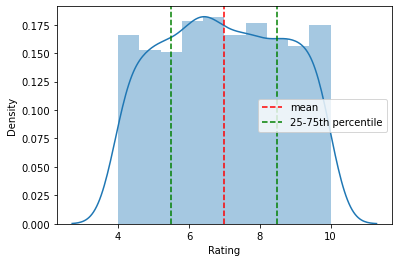

In [71]:
#show distribution plot for 'Rating'，add vertical line for mean and 25 and 75 percentile
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

The distribution of user ratings looks relatively uniform, and there doesn't seem to be any skewed in the left or right direction.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

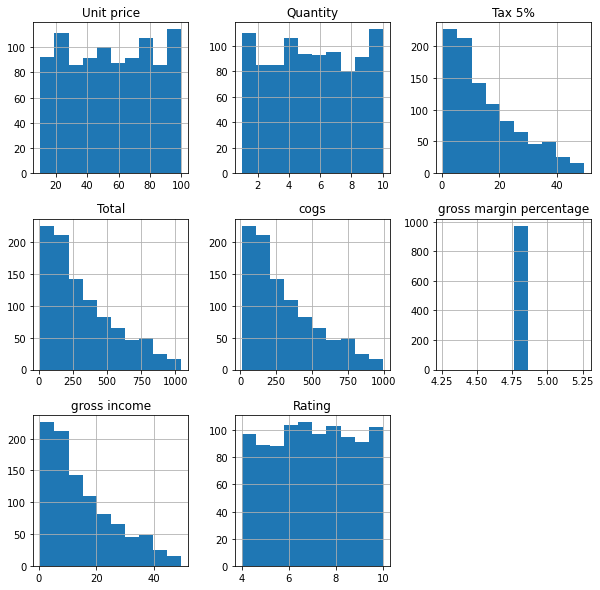

In [72]:
#show hist and configure image size by 10*10
df.hist(figsize=(10,10))

Question 2: Do aggregate sales numbers differ by much between branches?

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

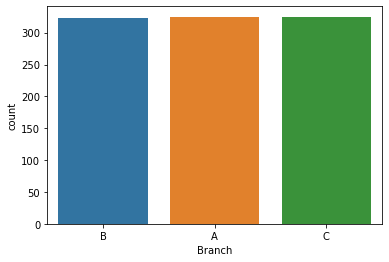

In [73]:
#show count plot for 'Branch'
sns.countplot(df['Branch'])

In [74]:
#show each count by 'Branch'
df['Branch'].value_counts()

A    325
C    324
B    323
Name: Branch, dtype: int64

Aggregate sales number don't differ by much between branches.

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

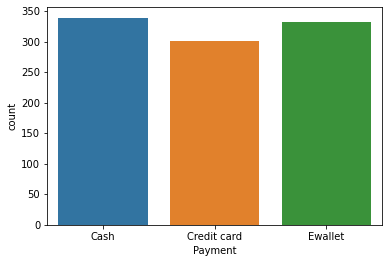

In [75]:
#show count plot by 'Payment'
sns.countplot(df['Payment'])

In [76]:
#show each count by 'Payment'
df['Payment'].value_counts()

Cash           339
Ewallet        332
Credit card    301
Name: Payment, dtype: int64

# Task 3: Bivariate Analysis

Question 3: Is there a relationship between gross income and customer ratings?

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

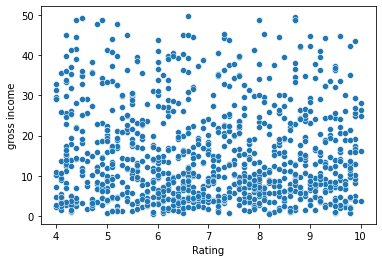

In [77]:
#show the scatter plot between 'Rating' and 'gross income'
sns.scatterplot(df['Rating'],df['gross income'])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

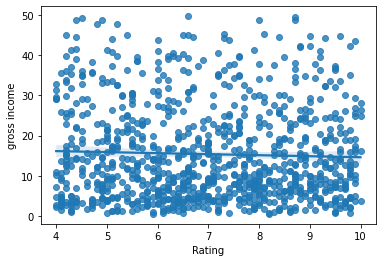

In [78]:
#show the regression plot between 'Rating' and 'gross income'
sns.regplot(df['Rating'],df['gross income'])

The trend line is pretty flat, which means there doesn't seem to be any relationship between gross income and customer ratings.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

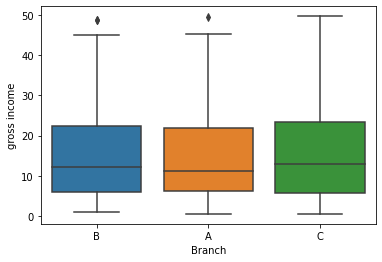

In [82]:
#show box plot between 'Branch' and 'gross income'
sns.boxplot(x=df['Branch'],y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

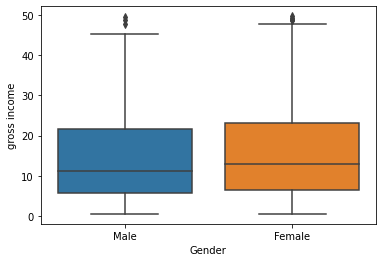

In [83]:
#show box plot between 'Gender' and 'gross income'
sns.boxplot(x=df['Gender'],y=df['gross income'])

Question 4: Is there a noticeable time trend in gross income?

In [84]:
#Since there will be multiple transactions happened in same date, we need to group date by mean,
#then each each date row is unique and it represents the average variable value for that particular day. 
df.groupby(df.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   53.394545  6.500000  18.561636  389.794364  371.232727   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   60.450000  4.363636  12.933818  271.610182  258.676364   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   65.627143  6.285714  22.270429  467.679000  445.408571   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.561636  6.554545  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     12.933818  7.281818  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     22.270429  7.100000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

In [85]:
#get the index of our grouped dataset
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='gross income'>

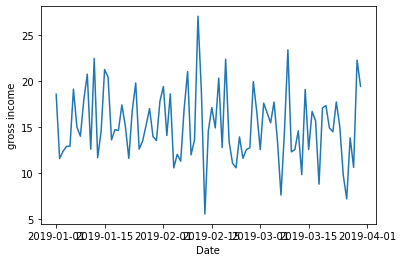

In [86]:
#let the index of our grouped dataset be the x-axes, 
#and the gross income from our grouped dataset be the y-axes
sns.lineplot(x=df.groupby(df.index).mean().index, 
             y=df.groupby(df.index).mean()['gross income'])

There doesn't seem to be any particular trend giving only three months of data.

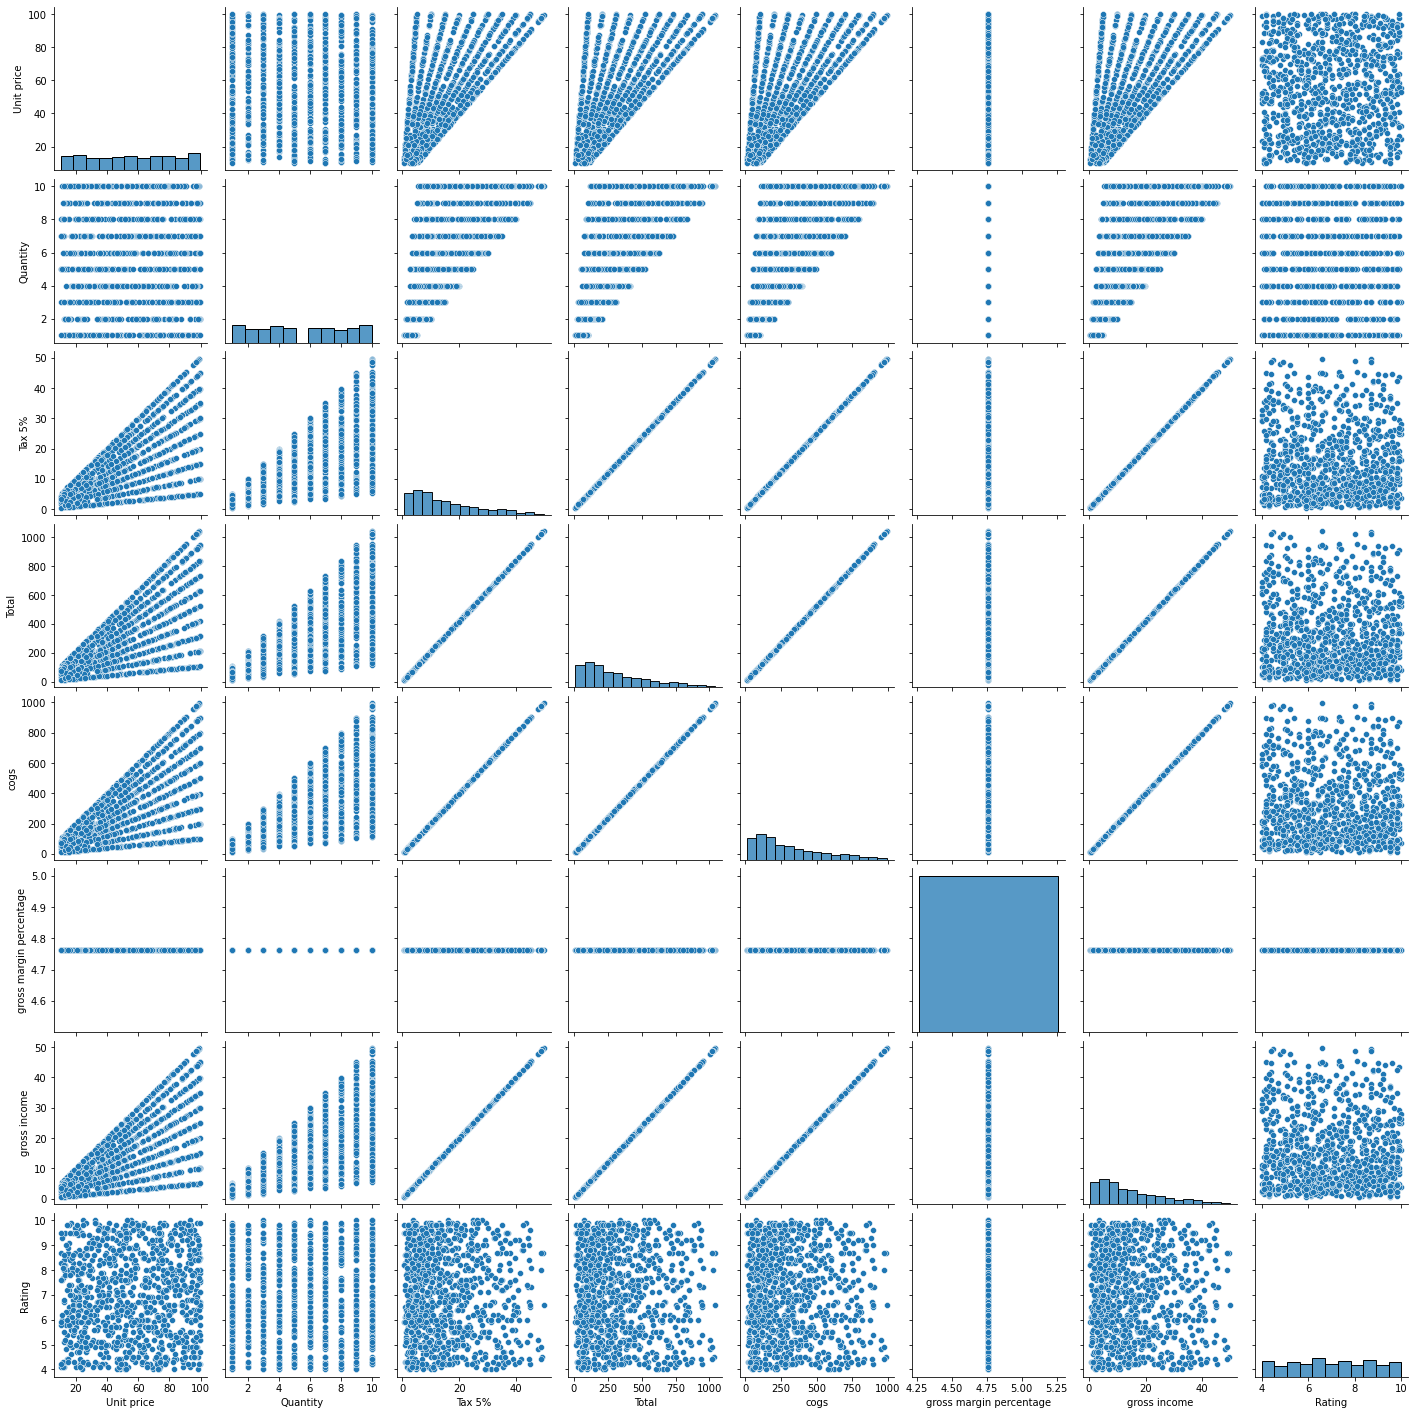

In [4]:
#plot all the bivariate relationships possible
sns.pairplot(df)

# Task 4: Dealing With Duplicate Rows and Missing Values

In [90]:
#checking how many rows in our datasets are duplicated
df.duplicated().sum()

3

In [91]:
#display rows that are duplicated in our datasets
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [92]:
#remove duplicated rows
df.drop_duplicates(inplace=True)

In [93]:
#check again how many rows are duplicated
df.duplicated().sum()

0

In [95]:
#see the number of total missing value row and ratio
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.080495
Gender                     0.000000
Product line               0.040248
Unit price                 0.006192
Quantity                   0.019608
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

<AxesSubplot:ylabel='Date'>

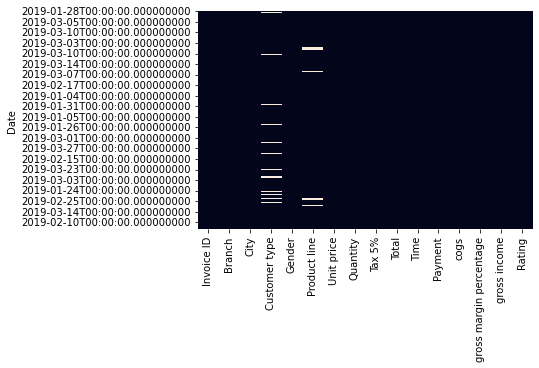

In [99]:
#see how are those missing values are distributed using heatmap
sns.heatmap(df.isnull(),cbar=False)

In [98]:
#fill missing value by 0
#df.fillna(0)
#fill missing value with each column's mean（only work for numerical value）， 
#and inplace set to be True, so that it's a permanent change
df.fillna(df.mean(),inplace=True)

C:\Users\zinin\AppData\Local\Temp/ipykernel_3428/107731377.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [100]:
#get the mode for each column（gonna fill with mode for categorical column）
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       C
City                                 Naypyitaw
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.579502
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                   Cash
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [101]:
#fill missing value with mode for categorical column
df.fillna(df.mode().iloc[0],inplace=True)

<AxesSubplot:ylabel='Date'>

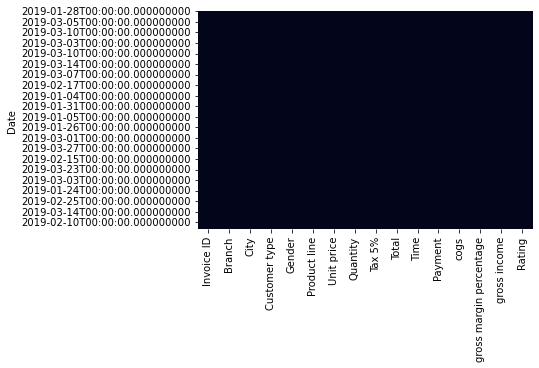

In [102]:
#check the missing value heatmap again
sns.heatmap(df.isnull(),cbar=False)

In [104]:
#another approach using pandas profiling
dataset = pd.read_csv('supermarket_sales2.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Task 5: Correlation Analysis

In [105]:
#find out the correlation between any two columns is, we can use numpy as np.corrcoef(), 
#which is a correlation coefficient of two columns.
np.corrcoef(df['gross income'],df['Rating'])

array([[ 1.        , -0.03477946],
       [-0.03477946,  1.        ]])

In [106]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.03

In [107]:
#correlation between every two columns
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.011624  0.627407  0.627407  0.627407   
Quantity                   0.011624  1.000000  0.702637  0.702637  0.702637   
Tax 5%                     0.627407  0.702637  1.000000  1.000000  1.000000   
Total                      0.627407  0.702637  1.000000  1.000000  1.000000   
cogs                       0.627407  0.702637  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.627407  0.702637  1.000000  1.000000  1.000000   
Rating                     0.001634 -0.027751 -0.034779 -0.034779 -0.034779   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.627407  0.001634  
Quantity                                     NaN      0.702637 -0.027751  
Tax 5%                                       NaN      1.000000 -0.034779  
Total                                        NaN      1.000000 -0.034779  
cogs                                         NaN      1.000000 -0.034779  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.034779  
Rating                                       NaN     -0.034779  1.000000

In [108]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                         0.00     -0.03   -0.03  -0.03 -0.03   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63    0.00  
Quantity                                     NaN          0.70   -0.03  
Tax 5%                                       NaN          1.00   -0.03  
Total                                        NaN          1.00   -0.03  
cogs                                         NaN          1.00   -0.03  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.03  
Rating                                       NaN         -0.03    1.00

<AxesSubplot:>

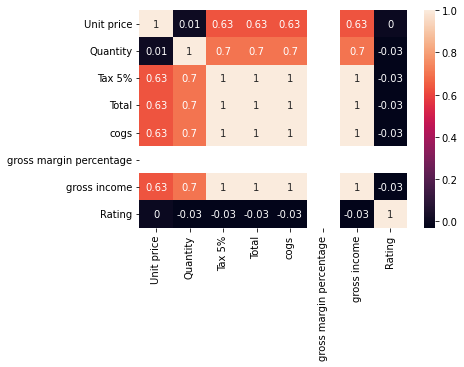

In [110]:
sns.heatmap(np.round(df.corr(),2), annot=True)